In [47]:
dir = 'hungarian.data'
with open(dir, encoding='Latin-1') as f:
    lines = [line.rstrip() for line in f]

lines[0:10]

['1254 0 40 1 1 0 0',
 '-9 2 140 0 289 -9 -9 -9',
 '0 -9 -9 0 12 16 84 0',
 '0 0 0 0 150 18 -9 7',
 '172 86 200 110 140 86 0 0',
 '0 -9 26 20 -9 -9 -9 -9',
 '-9 -9 -9 -9 -9 -9 -9 12',
 '20 84 0 -9 -9 -9 -9 -9',
 '-9 -9 -9 -9 -9 1 1 1',
 '1 1 -9. -9. name']

In [64]:
import itertools
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [49]:
data = itertools.takewhile(
    lambda x: len(x) == 76,
    (' '.join(lines[i:i+10]).split() for i in range(0, len(lines), 10)
))

df = pd.DataFrame.from_records(data)

df.head()

,0,1,2,3,4,5,6,7,8,9,...,66,67,68,69,70,71,72,73,74,75
0,1254,0,40,1,1,0,0,-9,2,140,...,-9,-9,1,1,1,1,1,-9.,-9.,name
1,1255,0,49,0,1,0,0,-9,3,160,...,-9,-9,1,1,1,1,1,-9.,-9.,name
2,1256,0,37,1,1,0,0,-9,2,130,...,-9,-9,1,1,1,1,1,-9.,-9.,name
3,1257,0,48,0,1,1,1,-9,4,138,...,2,-9,1,1,1,1,1,-9.,-9.,name
4,1258,0,54,1,1,0,1,-9,3,150,...,1,-9,1,1,1,1,1,-9.,-9.,name


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 76 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       294 non-null    object
 1   1       294 non-null    object
 2   2       294 non-null    object
 3   3       294 non-null    object
 4   4       294 non-null    object
 5   5       294 non-null    object
 6   6       294 non-null    object
 7   7       294 non-null    object
 8   8       294 non-null    object
 9   9       294 non-null    object
 10  10      294 non-null    object
 11  11      294 non-null    object
 12  12      294 non-null    object
 13  13      294 non-null    object
 14  14      294 non-null    object
 15  15      294 non-null    object
 16  16      294 non-null    object
 17  17      294 non-null    object
 18  18      294 non-null    object
 19  19      294 non-null    object
 20  20      294 non-null    object
 21  21      294 non-null    object
 22  22      294 non-null    ob

In [51]:
df = df.iloc[:, :-1]
df = df.drop(df.columns[0], axis=1)

In [52]:
df = df.astype(float)
df.info()  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 74 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   1       294 non-null    float64
 1   2       294 non-null    float64
 2   3       294 non-null    float64
 3   4       294 non-null    float64
 4   5       294 non-null    float64
 5   6       294 non-null    float64
 6   7       294 non-null    float64
 7   8       294 non-null    float64
 8   9       294 non-null    float64
 9   10      294 non-null    float64
 10  11      294 non-null    float64
 11  12      294 non-null    float64
 12  13      294 non-null    float64
 13  14      294 non-null    float64
 14  15      294 non-null    float64
 15  16      294 non-null    float64
 16  17      294 non-null    float64
 17  18      294 non-null    float64
 18  19      294 non-null    float64
 19  20      294 non-null    float64
 20  21      294 non-null    float64
 21  22      294 non-null    float64
 22  23

In [53]:
df.replace(-9.0, np.nan, inplace=True)

df.head()

,1,2,3,4,5,6,7,8,9,10,...,65,66,67,68,69,70,71,72,73,74
0,0.0,40.0,1.0,1.0,0.0,0.0,NaN,2.0,140.0,0.0,...,NaN,NaN,NaN,1.0,1.0,1.0,1.0,1.0,NaN,NaN
1,0.0,49.0,0.0,1.0,0.0,0.0,NaN,3.0,160.0,1.0,...,NaN,NaN,NaN,1.0,1.0,1.0,1.0,1.0,NaN,NaN
2,0.0,37.0,1.0,1.0,0.0,0.0,NaN,2.0,130.0,0.0,...,NaN,NaN,NaN,1.0,1.0,1.0,1.0,1.0,NaN,NaN
3,0.0,48.0,0.0,1.0,1.0,1.0,NaN,4.0,138.0,0.0,...,NaN,2.0,NaN,1.0,1.0,1.0,1.0,1.0,NaN,NaN
4,0.0,54.0,1.0,1.0,0.0,1.0,NaN,3.0,150.0,0.0,...,NaN,1.0,NaN,1.0,1.0,1.0,1.0,1.0,NaN,NaN


In [54]:
# (1) Kolom 3 (age)
# (2) Kolom 4 (sex)
# (3) Kolom 9 (cp)
# (4) Kolom 10 (trestbps)
# (5) Kolom 12 (chol)
# (6) Kolom 16 (fbs)
# (7) Kolom 19 (restecg)
# (8) Kolom 32 (thalach)
# (9) Kolom 38 (exang)
# (10) Kolom 40 (oldpeak)
# (11) Kolom 41 (slope)
# (12) Kolom 44 (ca)
# (13) Kolom 51 (thal)
# (14) Kolom 58 (num/target)

In [55]:
# Daftar kolom yang ingin Anda gunakan sebagai fitur
df_select = df.iloc[:, [1,2,7,8,10,14,17,30,36,38,39,42,49,56]]  

# Menampilkan DataFrame dengan kolom yang dipilih
print(df_select)

       2    3    8      9      11   15   18     31   37   39   40  43   50  \
0    40.0  1.0  2.0  140.0  289.0  0.0  0.0  172.0  0.0  0.0  NaN NaN  NaN   
1    49.0  0.0  3.0  160.0  180.0  0.0  0.0  156.0  0.0  1.0  2.0 NaN  NaN   
2    37.0  1.0  2.0  130.0  283.0  0.0  1.0   98.0  0.0  0.0  NaN NaN  NaN   
3    48.0  0.0  4.0  138.0  214.0  0.0  0.0  108.0  1.0  1.5  2.0 NaN  NaN   
4    54.0  1.0  3.0  150.0    NaN  0.0  0.0  122.0  0.0  0.0  NaN NaN  NaN   
..    ...  ...  ...    ...    ...  ...  ...    ...  ...  ...  ...  ..  ...   
289  48.0  0.0  2.0    NaN  308.0  0.0  1.0    NaN  NaN  2.0  1.0 NaN  NaN   
290  36.0  1.0  2.0  120.0  166.0  0.0  0.0  180.0  0.0  0.0  NaN NaN  NaN   
291  48.0  1.0  3.0  110.0  211.0  0.0  0.0  138.0  0.0  0.0  NaN NaN  6.0   
292  47.0  0.0  2.0  140.0  257.0  0.0  0.0  135.0  0.0  1.0  1.0 NaN  NaN   
293  53.0  1.0  4.0  130.0  182.0  0.0  0.0  148.0  0.0  0.0  NaN NaN  NaN   

      57  
0    0.0  
1    1.0  
2    0.0  
3    3.0  
4    0.0

In [56]:
features_dict = {
    2:"age",
    3:"sex",
    8:"cp",
    9:"trestbps",
    11:"chol",
    15:"fbs",
    18:"restecg",
    31:"thalach",
    37:"exang",
    39:"oldpeak",
    40:"slope",
    43:"ca",
    50:"thal",
    57:"target"
}

df_select.rename(columns=features_dict, inplace=True)
df_select.head()

C:\Users\d\AppData\Local\Temp\ipykernel_31168\3719889940.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_select.rename(columns=features_dict, inplace=True)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,40.0,1.0,2.0,140.0,289.0,0.0,0.0,172.0,0.0,0.0,NaN,NaN,NaN,0.0
1,49.0,0.0,3.0,160.0,180.0,0.0,0.0,156.0,0.0,1.0,2.0,NaN,NaN,1.0
2,37.0,1.0,2.0,130.0,283.0,0.0,1.0,98.0,0.0,0.0,NaN,NaN,NaN,0.0
3,48.0,0.0,4.0,138.0,214.0,0.0,0.0,108.0,1.0,1.5,2.0,NaN,NaN,3.0
4,54.0,1.0,3.0,150.0,NaN,0.0,0.0,122.0,0.0,0.0,NaN,NaN,NaN,0.0


In [57]:
df_select.isnull().sum()

age           0
sex           0
cp            0
trestbps      1
chol         23
fbs           8
restecg       1
thalach       1
exang         1
oldpeak       0
slope       190
ca          290
thal        266
target        0
dtype: int64

In [58]:
drop_columns = ['slope', 'ca', 'thal']
df_select.drop(drop_columns, axis=1, inplace=True)
df_select.isnull().sum()

C:\Users\d\AppData\Local\Temp\ipykernel_31168\2054314881.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_select.drop(drop_columns, axis=1, inplace=True)


age          0
sex          0
cp           0
trestbps     1
chol        23
fbs          8
restecg      1
thalach      1
exang        1
oldpeak      0
target       0
dtype: int64

In [59]:
df_clean = df_select.copy()

In [60]:
handle_columns = ['trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang']
handle_null = {}

for col in handle_columns:
    if df_clean[col].isnull().sum() != 0:
        # continue
        handle_null[col] = df_select[col].dropna()
        mean_value = handle_null[col].astype(float).mean()
        mean_value_round = round(mean_value)
        print(f"Mean {col} : {mean_value_round}")
        fill_value = {col: mean_value_round}
        df_clean.fillna(value=fill_value, inplace=True)

df_clean.isnull().sum()


Mean trestbps : 133
Mean chol : 251
Mean fbs : 0
Mean restecg : 0
Mean thalach : 139
Mean exang : 0


age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
target      0
dtype: int64

In [61]:
df_clean.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,target
0,40.0,1.0,2.0,140.0,289.0,0.0,0.0,172.0,0.0,0.0,0.0
1,49.0,0.0,3.0,160.0,180.0,0.0,0.0,156.0,0.0,1.0,1.0
2,37.0,1.0,2.0,130.0,283.0,0.0,1.0,98.0,0.0,0.0,0.0
3,48.0,0.0,4.0,138.0,214.0,0.0,0.0,108.0,1.0,1.5,3.0
4,54.0,1.0,3.0,150.0,251.0,0.0,0.0,122.0,0.0,0.0,0.0


In [62]:
print(df_clean.duplicated().sum())
df_clean[df_clean.duplicated(keep=False)]

1


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,target
90,49.0,0.0,2.0,110.0,251.0,0.0,0.0,160.0,0.0,0.0,0.0
163,49.0,0.0,2.0,110.0,251.0,0.0,0.0,160.0,0.0,0.0,0.0


In [65]:
if df_clean.duplicated().sum() != 0:
    dfClean = df_clean.drop_duplicates()
    
print(dfClean.duplicated().sum())
dfClean[dfClean.duplicated(keep=False)]

0


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,target


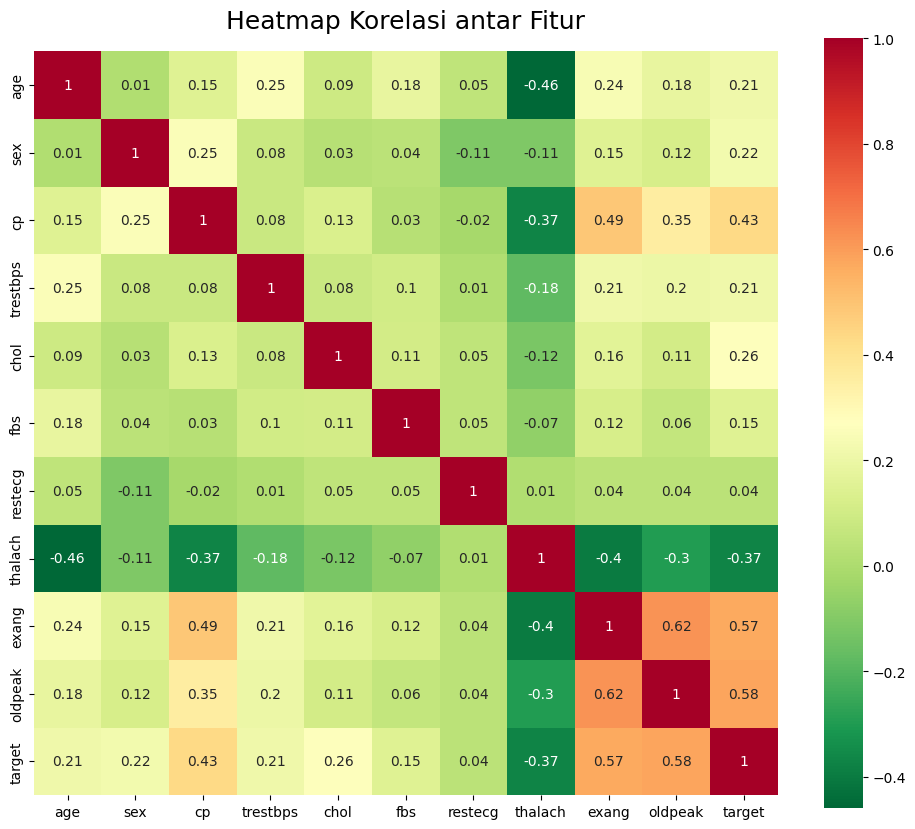

In [69]:
correlation = dfClean.corr()
plt.figure(figsize=(12, 10))
plt.title("Heatmap Korelasi antar Fitur", y=1.02, fontdict={'size': 18})
sns.heatmap(
  correlation.round(2),
  annot = True,
  vmax = 1,
  square = True,
  cmap = 'RdYlGn_r'
)

plt.show()